# 學習資料的確認

In [57]:
import numpy as np
import matplotlib.pyplot as plt

輸入學習資料

In [58]:
train = np.loadtxt(open('/Users/shiliu/documents/click.csv'), delimiter = ',', skiprows = 1)
train_x = train[:,0]
train_y = train[:,1]

圖形

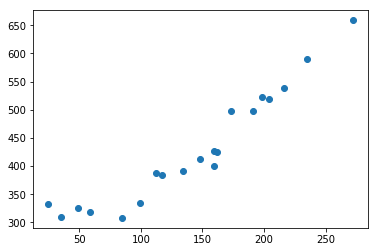

In [59]:
plt.plot(train_x, train_y, 'o')
plt.show()

# 以一次函數來編寫程式

初始化參數

In [60]:
theta0 = np.random.rand()
theta1 = np.random.rand()

預測函數

In [61]:
def f(x):
    return theta0 + theta1 * x

目標函數

In [70]:
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

標準化 / z-score正規化

z = (x - mu) / sigma 

#經由標準化，使參數更快收斂

In [72]:
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

畫圖

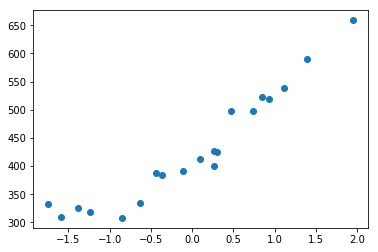

In [64]:
plt.plot(train_z, train_y, 'o')
plt.show()

# 撰寫參數更新式

學習率

In [65]:
ETA = 1e-3

誤差的差分

In [66]:
diff = 1

更新次數

In [67]:
count = 0

重複學習
#重複參數的更新直到誤差的差分變成0.01以下為止

In [68]:
error = E(train_z, train_y)
while diff > 1e-2:
    # 將更新結果儲存於臨時變數
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    theta0 = tmp0
    theta1 = tmp1
    # 計算與前一項誤差的差分
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    # 輸出日誌
    count += 1
    log = '{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1次: theta0 = 8.832, theta1 = 2.562, 差分 = 76253.2528
2次: theta0 = 17.238, theta1 = 4.380, 差分 = 73233.6239
3次: theta0 = 25.476, theta1 = 6.162, 差分 = 70333.5724
4次: theta0 = 33.550, theta1 = 7.908, 差分 = 67548.3630
5次: theta0 = 41.462, theta1 = 9.620, 差分 = 64873.4478
6次: theta0 = 49.216, theta1 = 11.297, 差分 = 62304.4593
7次: theta0 = 56.814, theta1 = 12.940, 差分 = 59837.2027
8次: theta0 = 64.261, theta1 = 14.551, 差分 = 57467.6494
9次: theta0 = 71.559, theta1 = 16.130, 差分 = 55191.9305
10次: theta0 = 78.711, theta1 = 17.677, 差分 = 53006.3301
11次: theta0 = 85.719, theta1 = 19.193, 差分 = 50907.2794
12次: theta0 = 92.588, theta1 = 20.678, 差分 = 48891.3511
13次: theta0 = 99.319, theta1 = 22.134, 差分 = 46955.2536
14次: theta0 = 105.916, theta1 = 23.561, 差分 = 45095.8256
15次: theta0 = 112.381, theta1 = 24.960, 差分 = 43310.0309
16次: theta0 = 118.716, theta1 = 26.330, 差分 = 41594.9537
17次: theta0 = 124.925, theta1 = 27.673, 差分 = 39947.7935
18次: theta0 = 131.009, theta1 = 28.989, 差分 = 38365.8609
19次: theta0 = 136.97

繪製學習資料與f函數

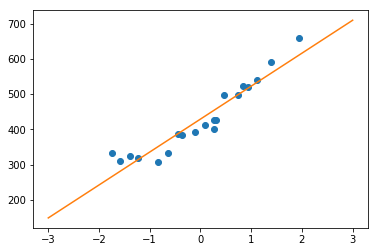

In [81]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

驗證

#輸入適切的x值以預測點擊數
#但因學習資料已進行標準化，所以預測資料也須經標準化

In [74]:
f(standardize(100))

370.9671251358767

In [82]:
f(standardize(200))

510.4697800795642

# 多項式回歸的程式

初始化參數

In [83]:
theta = np.random.rand(3)

建立學習資料的矩陣

In [90]:
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

In [91]:
X = to_matrix(train_z)

預測函數

In [95]:
def f(x):
    return np.dot(x, theta)

誤差的差分

In [96]:
diff = 1

重複學習

In [97]:
error = E(X, train_y)
while diff > 1e-2:
    # 更新參數
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 計算與前一項誤差的差分
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

繪製學習資料與函數

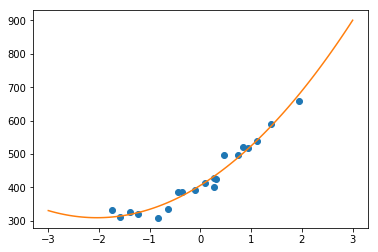

In [98]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

均方誤差 MSE

In [99]:
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y-f(x)) ** 2)

In [100]:
theta = np.random.rand(3)

均方誤差的歷史紀錄

In [103]:
errors = []

誤差的差分

In [102]:
diff = 1

重複學習

In [105]:
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

繪製誤差

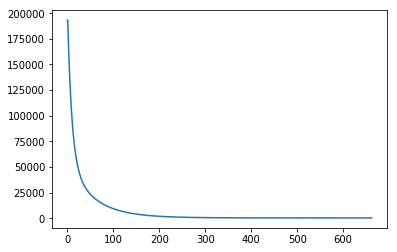

In [108]:
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

#可看出誤差逐漸變小